In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [3]:
#Loading Data
pd.set_option("display.width", 3000)
pd.set_option('display.max_rows', 1000)
data = pd.read_csv("heart.csv")
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2       1
5     57    1   0       140   192    0        1      148      0      0.4      1   0     1       1
6     56    0   1       140   294    0        0      153      0      1.3      1   0     2       1
7     44    1   1       120   263    0        1      173      0      0.0      2   0     3       1
8     52    1   2       172   199    1        1      162      0      0.5      2   0     3       1
9     57    1   2   

In [9]:
#Splitting Data

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data["target"], test_size=0.25, random_state=4)

X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

In [10]:
#Logisitic Regression Model
print("Logistic Regression Model: \n")

logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 4) #Making an instance of the model.

logisticRegr.fit(X_train, y_train) #Fitting the model on the training data. 

LogisticRegression(max_iter=1000, random_state=4)

In [11]:
#Equation for Logistic Regression
print(f"Intercept: {logisticRegr.intercept_}")
print("")
print(f"Coefficents: {logisticRegr.coef_}")

Intercept: [4.18671728]

Coefficents: [[-0.0079878  -1.37223233  0.80185237 -0.0204009  -0.00138602  0.06924716
   0.68170084  0.01236913 -0.75512184 -0.87633602  0.50294952 -0.78640781
  -0.70703948]]


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       105
           1       0.85      0.93      0.89       122

    accuracy                           0.87       227
   macro avg       0.88      0.87      0.87       227
weighted avg       0.87      0.87      0.87       227



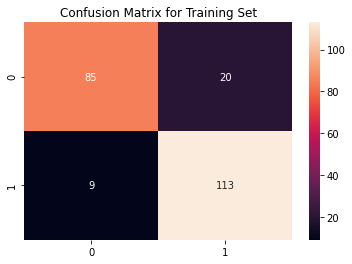

In [12]:
#Testing on the Training Set
print("\nTraining Set: \n")
y_pred_train = logisticRegr.predict(X_train) #Testing model on training set. 


#Classification Matrix
print(metrics.classification_report(y_train, y_pred_train))

#Confusion Matrix
cnf_train = metrics.confusion_matrix(y_train, y_pred_train)
cnf_train
sns.heatmap(cnf_train, annot=True, fmt="d")

b, t = plt.ylim()
plt.savefig("trainconf.png")
plt.title("Confusion Matrix for Training Set")
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



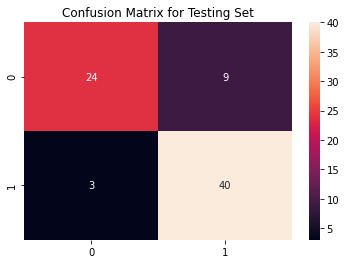

In [13]:
#Testing on the Testing Set
print("Testing Set: \n")
y_pred_test = logisticRegr.predict(X_test) #Testing model on testing set. 


#Classification Matrix
print(metrics.classification_report(y_test, y_pred_test))

#Confusion Matrix
cnf_test = metrics.confusion_matrix(y_test, y_pred_test)
cnf_test
sns.heatmap(cnf_test, annot=True, fmt="d")

b, t = plt.ylim()
plt.title("Confusion Matrix for Testing Set")
plt.savefig("testconf.png")
plt.show()